# Lane-line detection in Action

### Steps to
- Converting Image to GaryScale
- Reduce Noise by applying Gaussian Blur
- Applying Canny Method to identify Edges in Image
- Identifying Lane Lines of Region Of Intrest
- Hough Transfrom to detect stright lines in Region of Intrest
- Blending the Image on the Original Image

### Import resources

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Read and Display 

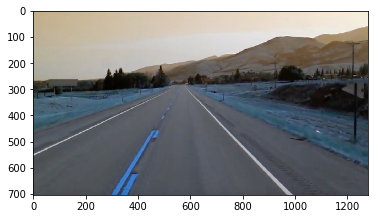

In [2]:
# Read the Image from the location
image = cv2.imread('test_image.jpg')

# Display it
plt.imshow(image)

#### Converting The Formal BGR to RGB 

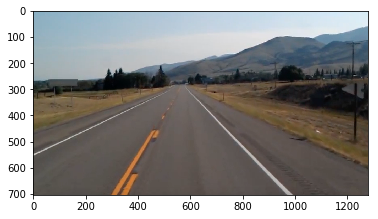

In [3]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Displaying the Image
plt.imshow(image)

#### Making a Copy of an Image to carry the workflow

In [4]:
# Creating a Copy of original Image
lane_image = np.copy(image)

## Converting the image into Gray Scale
As we discussed, Images are made of pixels, a color image will have three channels RGB red, green and blue in which each pixel is the combination of the values.

Where as a gray scale image only has one channel, each pixel with only one intensity value ranging form 0-255


In [5]:
gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)

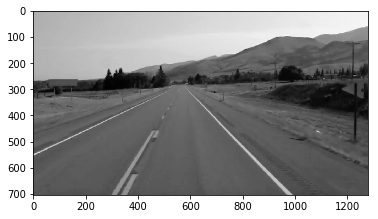

In [8]:
# Displaying the image in 'gray' Color Maping
plt.imshow(gray, cmap='gray')

## Applying Gaussian Blur

Gaussian Blur is used to smoothen and Reduce the noice in an Image.
Image noise can create false edges and ultimately affets the edge detection

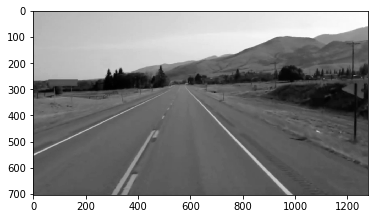

In [11]:
# Applying Gaussian Blur
blur = cv2.GaussianBlur(gray, (5,5), 0)

#displaying the Image
plt.imshow(blur, cmap='gray')

## Applying Canny Method to identify Edges in Image

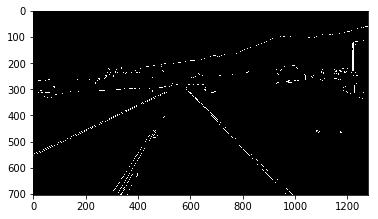

In [28]:
canny_image = cv2.Canny(blur, 50, 150)

# Display the image
plt.imshow(canny_image, cmap='gray')

Defining a Fuction for code redability  the Image with specified Sapce in the notebook will help you further.

In [22]:
# Defining a fuction from above steps or Canny Edge Method
def canny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny

# Defining a method for Displaying the Given Image.
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, 'gray')

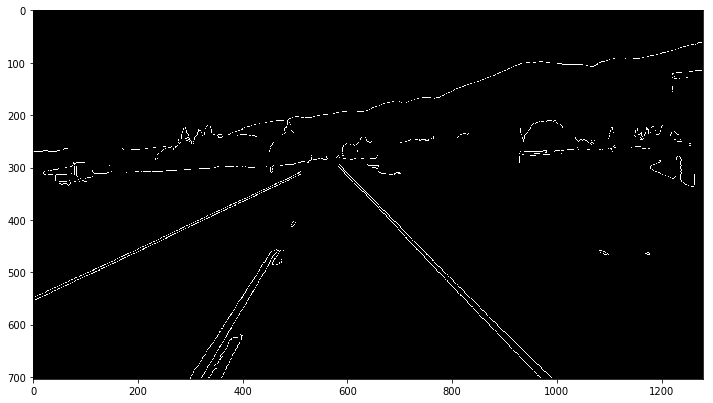

In [29]:
canny_img = canny(image)
display_img(canny_img)

## specifying Region of Intrest


In [38]:
# Defining a 
def region_of_intrest(image):
    height = image.shape[0]
    # Creating a polygon to place over the Edges Image to ignore the outer part
    polygon = np.array([[
                        (200, height),
                        (1100,height), 
                        (550, 250)
                        ]])
    # Masking the Image with created trangle 
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, polygon, 255)
    return mask

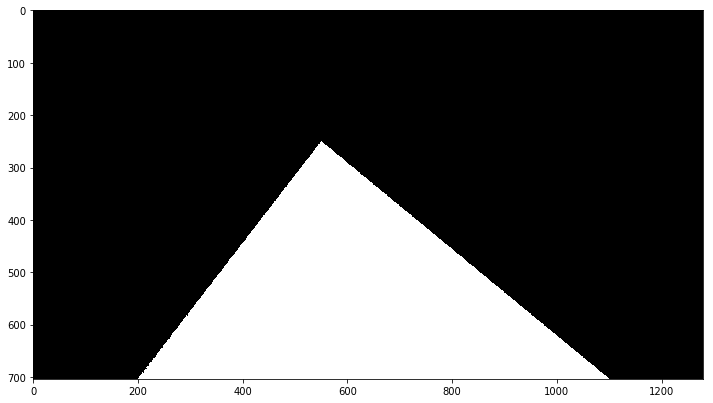

In [39]:
display_img(region_of_intrest(canny_image))

In [40]:
def region_of_intrest(image):
    height = image.shape[0]
    # Creating a polygon to place over the Edges Image to ignore the outer part
    polygon = np.array([[
                        (200, height),
                        (1100,height), 
                        (550, 250)
                        ]])
    # Masking the Image with created trangle 
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, polygon, 255)
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

In [44]:
cropped_image = region_of_intrest(canny_image)

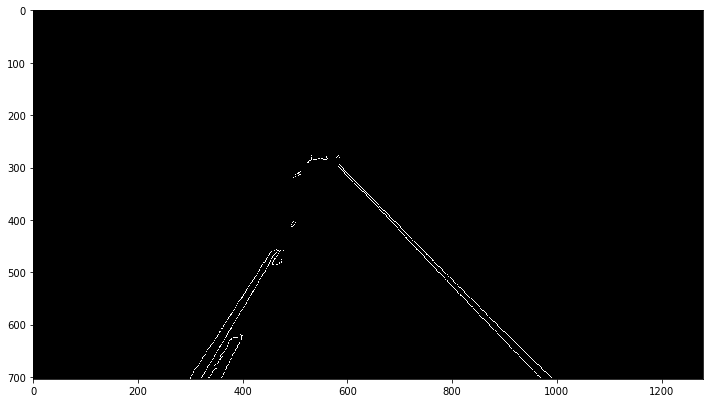

In [45]:
display_img(cropped_image)

## Implementing in video

In [ ]:
# Creating a video capture object by setting a variable 
cap = cv2.VideoCapture('test2.mp4')

while(cap.isOpened()):
    _, frame = cap.read()

## Setting Hough lines


In [47]:
lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)

# averaging the drawn

In [48]:
# Defining a function which takes in an image and displays the lines 
def display_lines(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
    return line_image

In [49]:
line_image = display_lines(lane_image, lines)

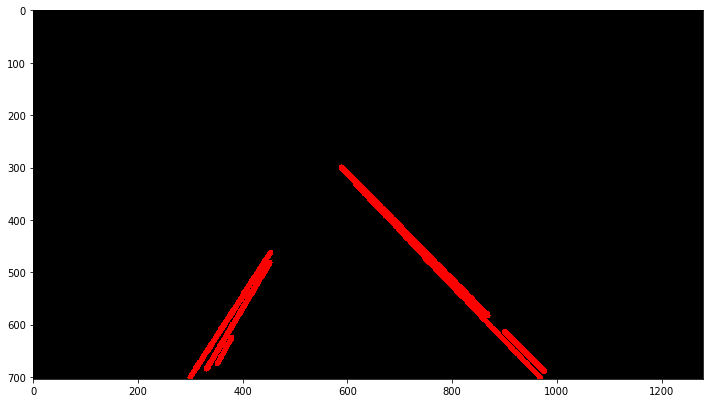

In [50]:
display_img(line_image)

In [51]:
# Blending the image with original image

combo_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1)

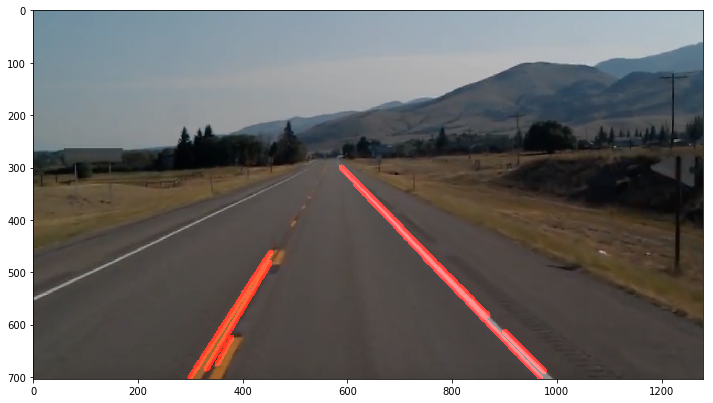

In [52]:
display_img(combo_image)

In [57]:
def make_coordinates(image, line_parameters):
    slope, intercept = line_parameters
    y1 = image.shape[0]
    y2 = int(y1*(3/5))
    x1 = int((y1-intercept)/slope)
    x2 = int((y2-intercept)/slope)
    return np.array([x1, y1, x2, y2])


def average_slope_intercept(image, lines):
    left_fit = []
    right_fit = []
    
    for lines in lines:
        x1, y1, x2, y2 = lines.reshape(4)
        parameters = np.polyfit((x1, x2), (y1, y2),1)
        slope = parameters[1]
        intercept = parameters[1]
        if slope <0:
            left_fit.append((slope, intercept))
        else:
            right_fit.append((slope, intercept))
    left_fit_average = np.average(left_fit, axis=0)
    right_fit_average = np.average(right_fit, axis=0)
    left_line = make_coordinates(image, left_fit_average)
    right_line = make_coordinates(image, right_fit_average)
    return np.array([left_line, right_line])

# averaging the drawn lines to optimise
averaged_lines = average_slope_intercept(lane_image, lines)
line_image = display_lines(lane_image, averaged_lines)
